<a href="https://colab.research.google.com/github/zahraDehghanian97/SCINet/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocess**

In [1]:
import pandas as pd
df = pd.read_csv('/content/MCIRD_aaic2021_train.csv', header=0)
df.head()


,day,subscriber_ecid,subscriber_gender,subscriber_age,registration_province,months_of_subscription,most_used_province,is_usage_nonzero,subscriber_total_expenses,nonpackage_voice_expenses,package_voice_noncash_expenses,is_voice_expenses_nonzero,is_voice_usage_nonzero,call_in_network_duration,call_off_netwrok_duration,nonpackage_call_in_network_expenses,nonpackage_call_off_network_expenses,total_call_duration,#inter_operator_calls,xyz_score,hxr_score,data_cash_expenses,nonpackage_data_expenses,package_data_noncash_expenses,subscriber_data_expenses,subscriber_nondata_expenses,data_usage_volume,is_data_expenses_nonzero,is_data_usage_nonzero,#activated_monthly_data_packages,#activated_short_term_data_packages,#activated_type_one_data_packages,#activated_type_two_data_packages,#activated_type_three_data_packages
0,(n)01,-06FoayTOXJ8-,1,36.0,8,188,8,1,-0.132373,-0.072802,0.0,1,1,-0.155626,0.0,-0.256454,0.0,-0.220797,0.0,0.031219,38.192862,0.0,0.0,0.0,0.0,-0.104687,0.072258,0,1,0,0,0,0,0
1,(n)02,-06FoayTOXJ8-,1,36.0,8,188,8,1,-0.122445,-0.060440,0.0,1,1,-0.142857,0.0,0.036145,0.0,-0.210668,0.0,0.033491,38.144232,0.0,0.0,0.0,0.0,-0.092861,0.049563,0,1,0,0,0,0,0
2,(n)03,-06FoayTOXJ8-,1,36.0,8,188,8,1,0.343066,0.519231,0.0,1,1,0.418196,0.0,0.762478,0.0,0.264686,0.0,0.036831,37.990377,0.0,0.0,0.0,0.0,0.461665,-0.013977,0,0,0,0,0,0,0
3,(n)04,-06FoayTOXJ8-,1,36.0,8,188,8,1,1.869763,2.420329,0.0,1,1,2.259377,0.0,3.144579,0.0,1.821742,0.0,0.039942,37.777398,0.0,0.0,0.0,0.0,2.280301,0.000403,0,1,0,0,0,0,0
4,(n)05,-06FoayTOXJ8-,1,36.0,8,188,8,1,-0.233858,-0.199176,0.0,1,1,-0.277733,0.0,-0.137693,0.0,-0.324105,0.0,0.042694,37.545275,0.0,0.0,0.0,0.0,-0.225579,0.016209,0,1,0,0,0,0,0


In [2]:
df1 = df[['subscriber_ecid', 'data_usage_volume']]
df1.head()

,subscriber_ecid,data_usage_volume
0,-06FoayTOXJ8-,0.072258
1,-06FoayTOXJ8-,0.049563
2,-06FoayTOXJ8-,-0.013977
3,-06FoayTOXJ8-,0.000403
4,-06FoayTOXJ8-,0.016209


خیلی از مقادیر دیتاست -0.0139766307813943 این هستن و میشه به راحتی اینارو جایگزین کرد

In [3]:
unique_sub_id = set(df1['subscriber_ecid'].values)

In [4]:
len(unique_sub_id)

100

use just sample with 69 element

In [5]:
import numpy as np
data_list = []
for sub_id in unique_sub_id:
    # print(sub_id)
    temp = df1[df1['subscriber_ecid']==sub_id].values
    if temp.shape[0] < 69:
        print(temp.shape)
        print(sub_id)
    else:
        data_list.append(temp)

(60, 2)
-QXHomYaJxYXi
(61, 2)
0o-xDa8uTNBGu
(1, 2)
37v4v4PPObMC_
(18, 2)
1EN04BS-9nKgc
(1, 2)
32ez6CX89v6KZ
(68, 2)
-DgEYYT0gqMqr
(67, 2)
-XU6p4P-782mp
(2, 2)
28gWxNYMU_2dg
(53, 2)
0T7ixhiDdZ8TL
(22, 2)
-gjfIaG2oxwzj


data plot

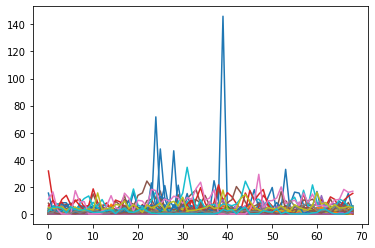

In [6]:
import matplotlib.pyplot as plt
for j in range(len(data_list)) :
  one_sample = data_list[j]
  y = one_sample[:,1]
  x = []

  for i in range(len(one_sample[:,1])):
    x.append(i)
  plt.plot(x,y)

plt.show()

# **LSTM Model**

In [7]:
X = []
y = []
mem_step = 14

for item in data_list:
  for i in range(mem_step, 69):
      X.append(item[i-mem_step:i, 1:2])
      # print(item[i-mem_step:i, 1:2])
      y.append(item[i, 1:2])

X, y = np.array(X), np.array(y)
X, y = X.astype('float32'), y.astype('float32')

In [8]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# check GPU availability
print("GPU is available :)" if tf.config.list_physical_devices("GPU") else "Not available :(")

import warnings
warnings.filterwarnings("ignore")

GPU is available :)


In [35]:
from tensorflow.keras.backend import clear_session 
clear_session()
keras_reg = Sequential()

keras_reg.add(LSTM(units = 64, return_sequences = True, input_shape = (X.shape[1], 1)))
keras_reg.add(Dropout(0.4))

keras_reg.add(LSTM(units = 100, return_sequences = True))
keras_reg.add(Dropout(0.4))

keras_reg.add(LSTM(units = 100, return_sequences = True))
keras_reg.add(Dropout(0.2))

keras_reg.add(LSTM(units = 16))
keras_reg.add(Dropout(0.2))

# keras_reg.add(Dense(units=32, activation='relu' ))
keras_reg.add(Dense(units=16, activation='relu' ))
keras_reg.add(Dense(units = 1))
keras_reg.compile(optimizer = 'adam',
                  loss = 'mean_squared_error',
                  metrics='mse')
# keras_reg.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
history = keras_reg.fit(X_train, y_train,validation_split=0.2,shuffle=False,epochs = 30,verbose = 1)

Epoch 1/30
99/99 [==============================] - 8s 28ms/step - loss: 14.3707 - mse: 14.3707 - val_loss: 5.4612 - val_mse: 5.4612
Epoch 2/30
99/99 [==============================] - 1s 11ms/step - loss: 13.0289 - mse: 13.0289 - val_loss: 5.0439 - val_mse: 5.0439
Epoch 3/30
99/99 [==============================] - 1s 11ms/step - loss: 12.5689 - mse: 12.5689 - val_loss: 4.7255 - val_mse: 4.7255
Epoch 4/30
99/99 [==============================] - 1s 11ms/step - loss: 12.4230 - mse: 12.4230 - val_loss: 4.5919 - val_mse: 4.5919
Epoch 5/30
99/99 [==============================] - 1s 11ms/step - loss: 12.0877 - mse: 12.0877 - val_loss: 4.2216 - val_mse: 4.2216
Epoch 6/30
99/99 [==============================] - 1s 11ms/step - loss: 12.0400 - mse: 12.0400 - val_loss: 4.1053 - val_mse: 4.1053
Epoch 7/30
99/99 [==============================] - 1s 11ms/step - loss: 11.7191 - mse: 11.7191 - val_loss: 3.9907 - val_mse: 3.9907
Epoch 8/30
99/99 [==============================] - 1s 11ms/step - lo

2.784862872023127


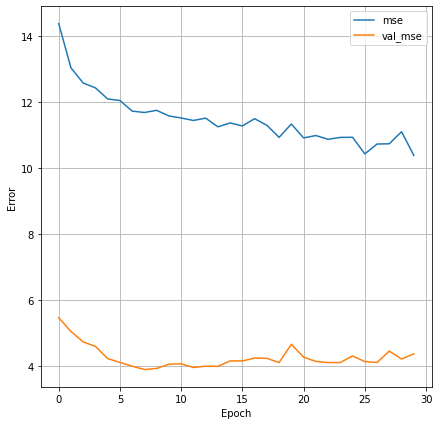

In [36]:
from math import sqrt

def plot_loss(history):
  fig = plt.figure(figsize=(7,7))
  plt.plot(history.history['mse'], label='mse')
  plt.plot(history.history['val_mse'], label='val_mse')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

predicted_stock_price = keras_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
print(sqrt(mean_squared_error(y_test, predicted_stock_price)))